In [1]:
# Load Packages
library(Pando)
library(Seurat)
library(BSgenome.Hsapiens.UCSC.hg38)
library(tidyverse) # need this for pivot_wider()

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Loading required package: GenomeInfoDb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pma

## Running Pando
08c_pando_subsets.R

# Subset sample - seems to lose information compared to running on entire dataset
DASA_HIC2, DASA_NT, DMSO_NT

In [2]:
# load everything# DASA_HIC2dasa_hic2_sobj <- readRDS('{PATH_1}')dasa_hic2_module <- readRDS('{PATH_2}')# DASA_NTdasa_nt_sobj <- readRDS('{PATH_3}')dasa_nt_module <- readRDS('{PATH_4}')# DMSO_NTdmso_nt_sobj <- readRDS('{PATH_5}')dmso_nt_module <- readRDS('{PATH_6}')

In [3]:
# plot sizes 
options(repr.plot.width=15, repr.plot.height=12)

In [90]:
# function to make full GRN plots
# Inputs:
# sobj: seurat object run through pando
make_plots <- function(sobj, plot_title=''){
    GetNetwork(sobj)
    print(plot_gof(sobj, point_size=2))
    print(plot_module_metrics(sobj) + ggtitle(plot_title))

    sobj <- get_network_graph(sobj, graph_name = "umap_graph")
    print(plot_network_graph(sobj, graph="umap_graph") + ggtitle(plot_title))

    # sobj <- get_network_graph(
    #     sobj, 
    #     graph_name = 'full_graph', 
    #     umap_method = 'none'
    # )

    # p1 <- plot_network_graph(sobj, graph='full_graph', layout='fr', text_size=5)
    # p2 <- plot_network_graph(sobj, graph='full_graph', layout='drl', text_size=5)
    # p3 <- plot_network_graph(sobj, graph='full_graph', layout='eigen', text_size=5)
    # p4 <- plot_network_graph(sobj, graph='full_graph', layout='matrix', text_size=5)
    # # (p1 | p2) / (p3 | p4)
    # sobj <- get_network_graph(
    #     sobj, 
    #     graph_name = 'sub_graph', 
    #     umap_method = 'none',
    #     features = feature_list)
    # plot_network_graph(muo_data, graph='sub_graph', node_size=5)


    return(sobj)
}


In [85]:
# subset plots
# function to make subset GRN plots
# Inputs:
# sobj: seurat object run through pando
# feature_list: GRN features of interest
make_subset_plots <- function(sobj, feature_list, plot_title=''){
    sobj <- get_network_graph(sobj)
    sobj <- get_network_graph(
        sobj,
        graph_name = 'sub_graph',
        umap_method = 'none',
        features = feature_list
    )
    print(plot_network_graph(sobj, graph='sub_graph', layout = 'fr', node_size=5) + ggtitle(plot_title))
    return(sobj)
}

Warning message:
“Using alpha for a discrete variable is not advised.”
Computing gene-gene correlation

Computing weighted regulatory factor

Computing UMAP embedding

Getting network graph



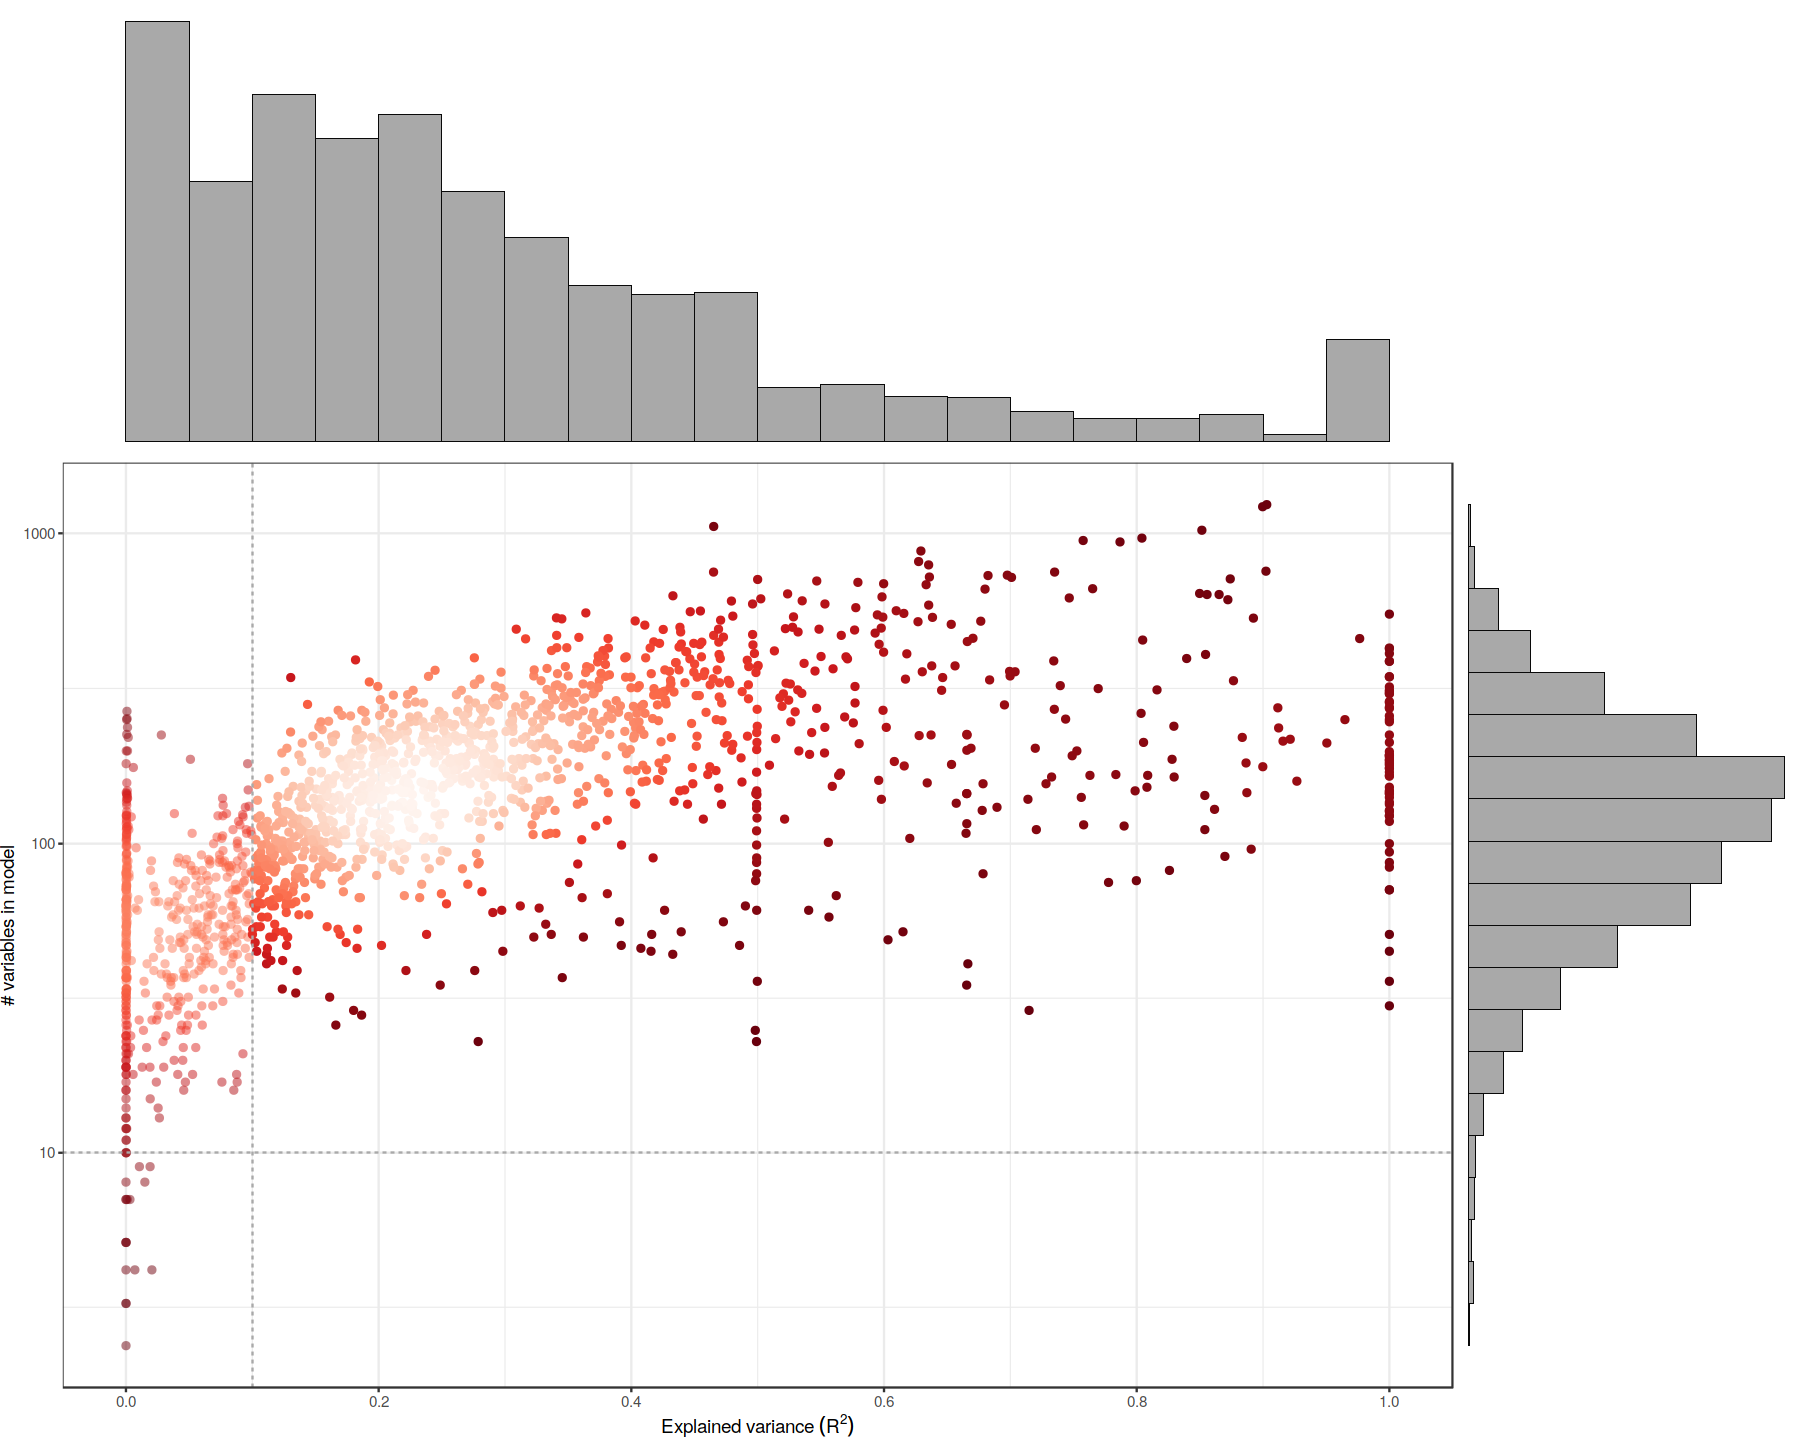

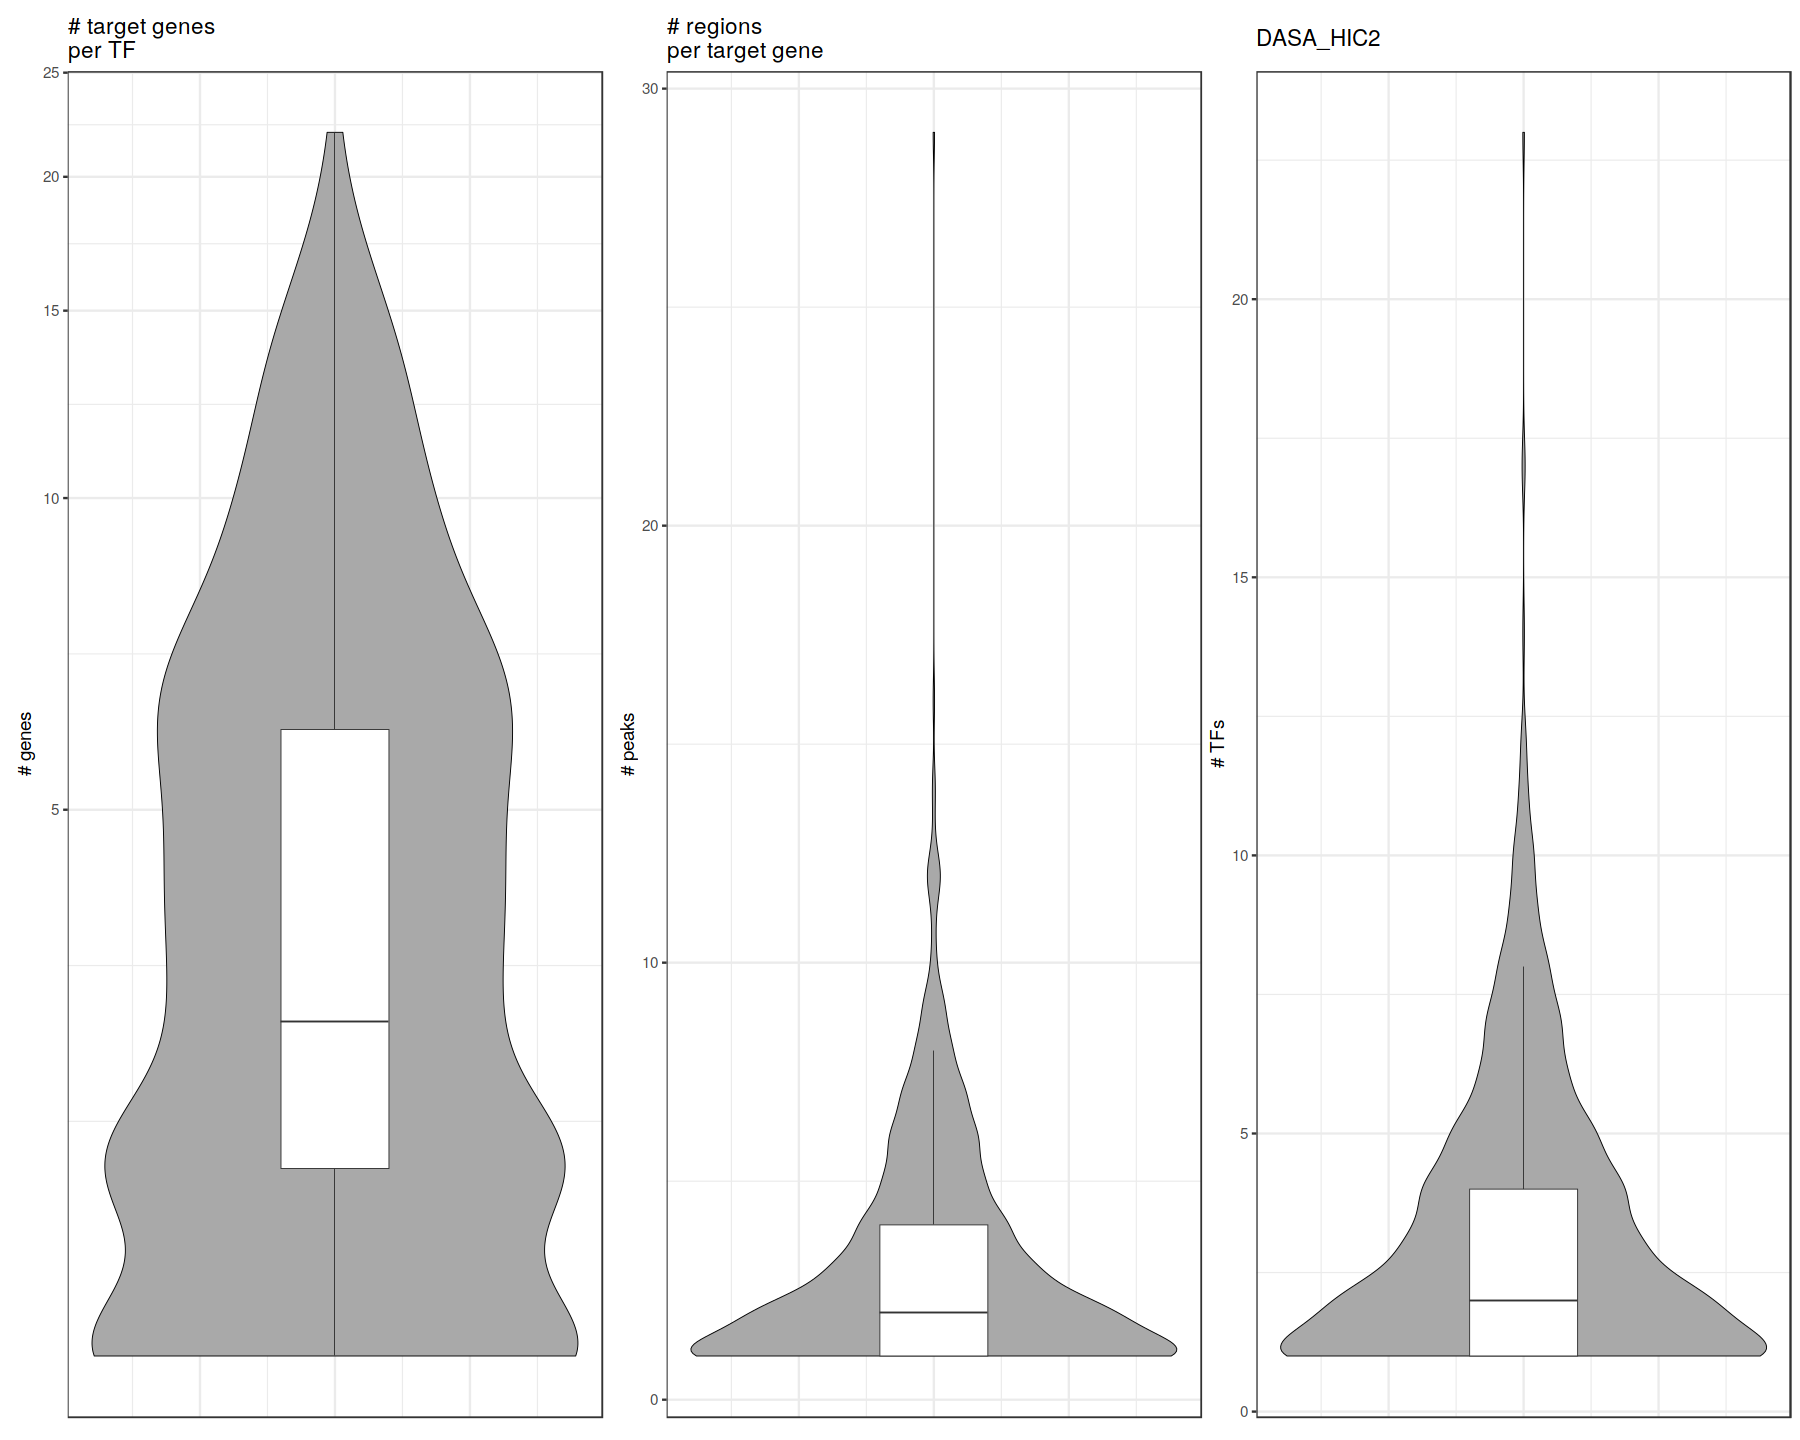

Warning message:
“Using alpha for a discrete variable is not advised.”


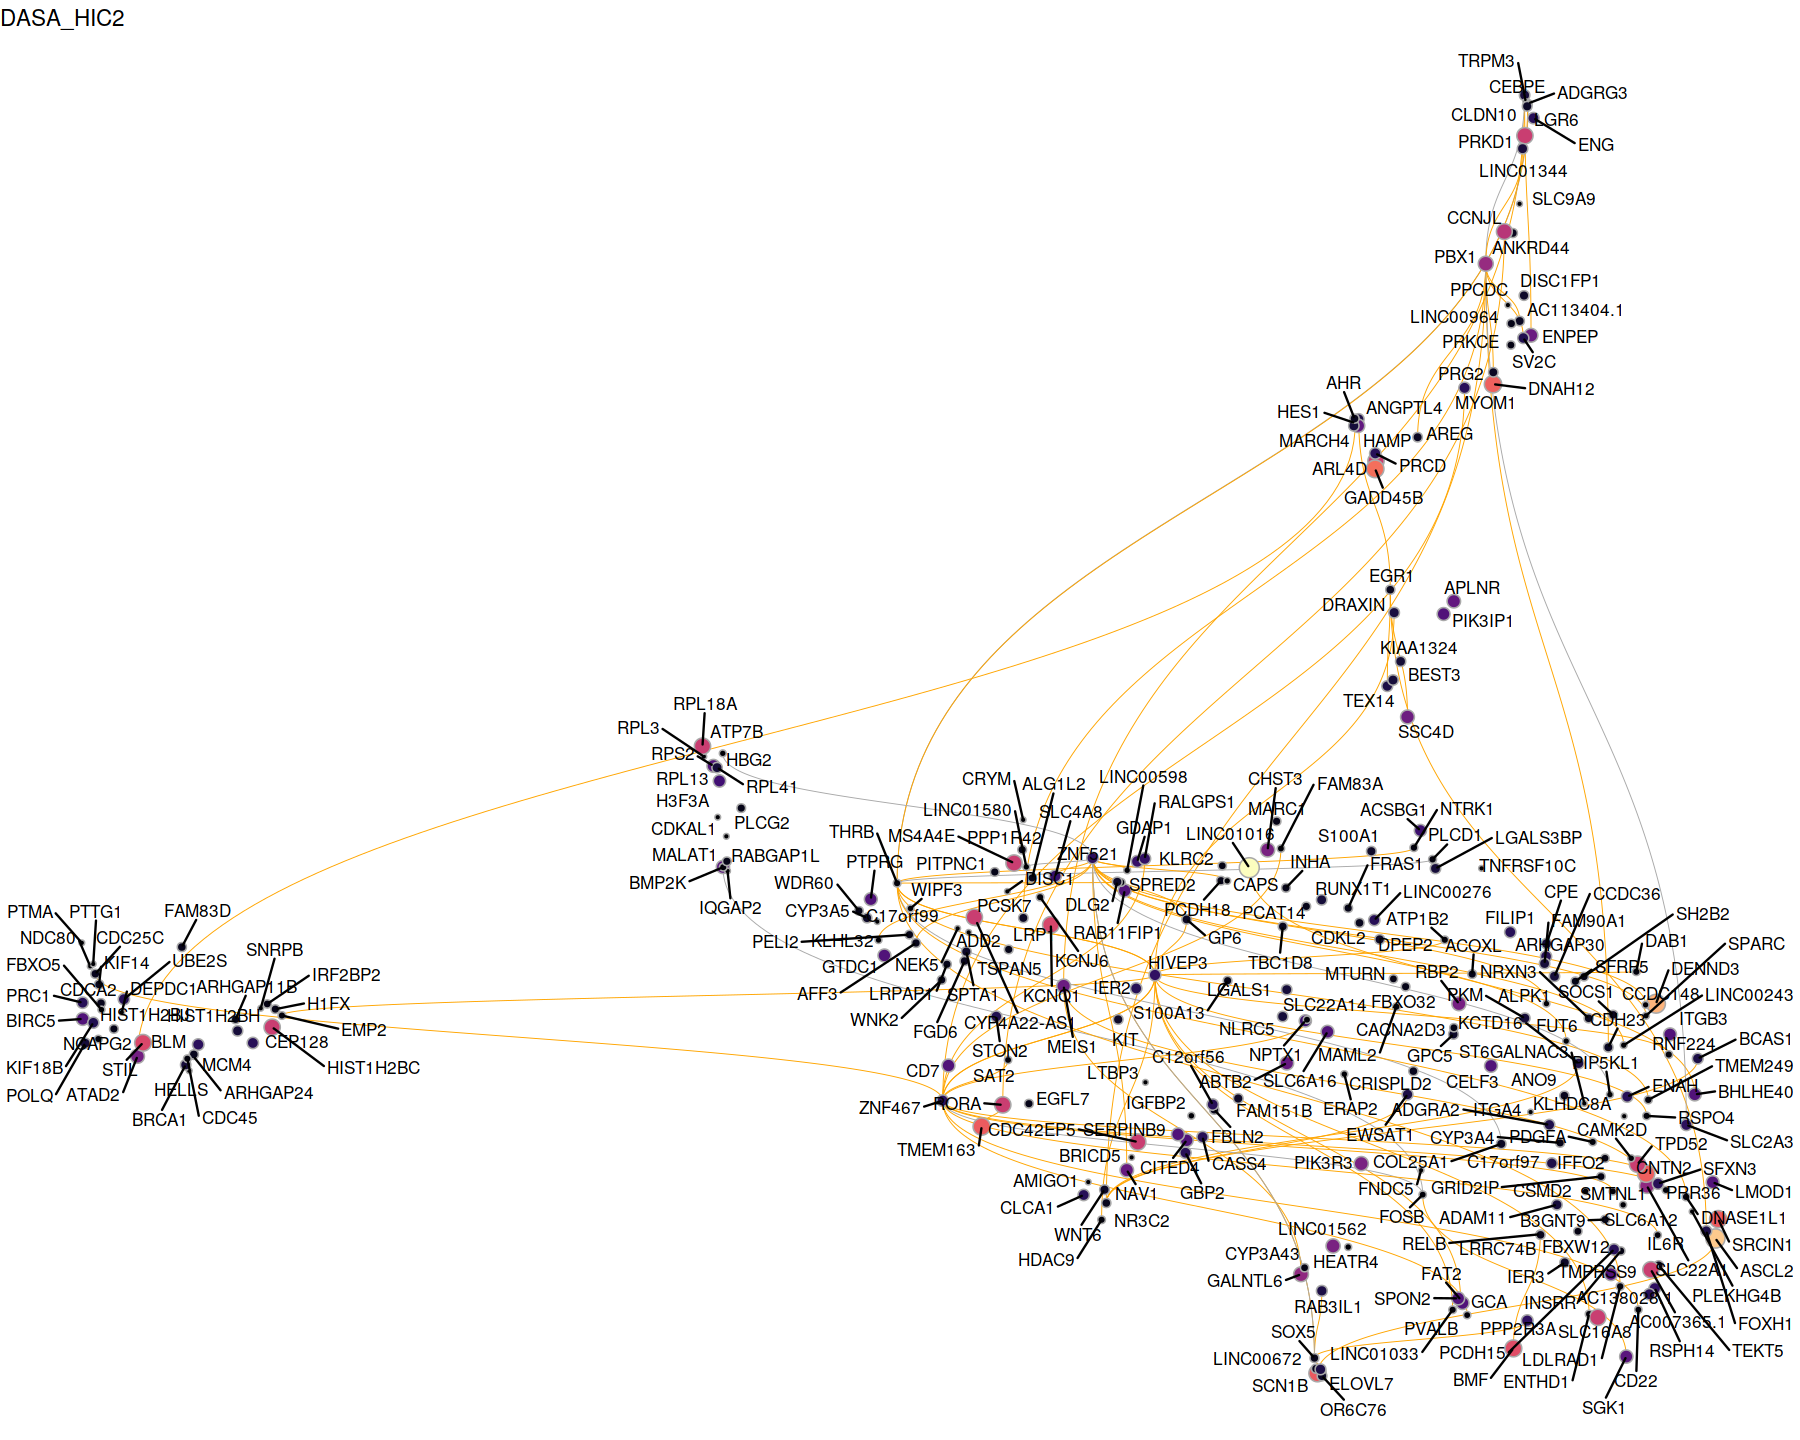

Computing gene-gene correlation

Computing weighted regulatory factor

Computing UMAP embedding

Getting network graph



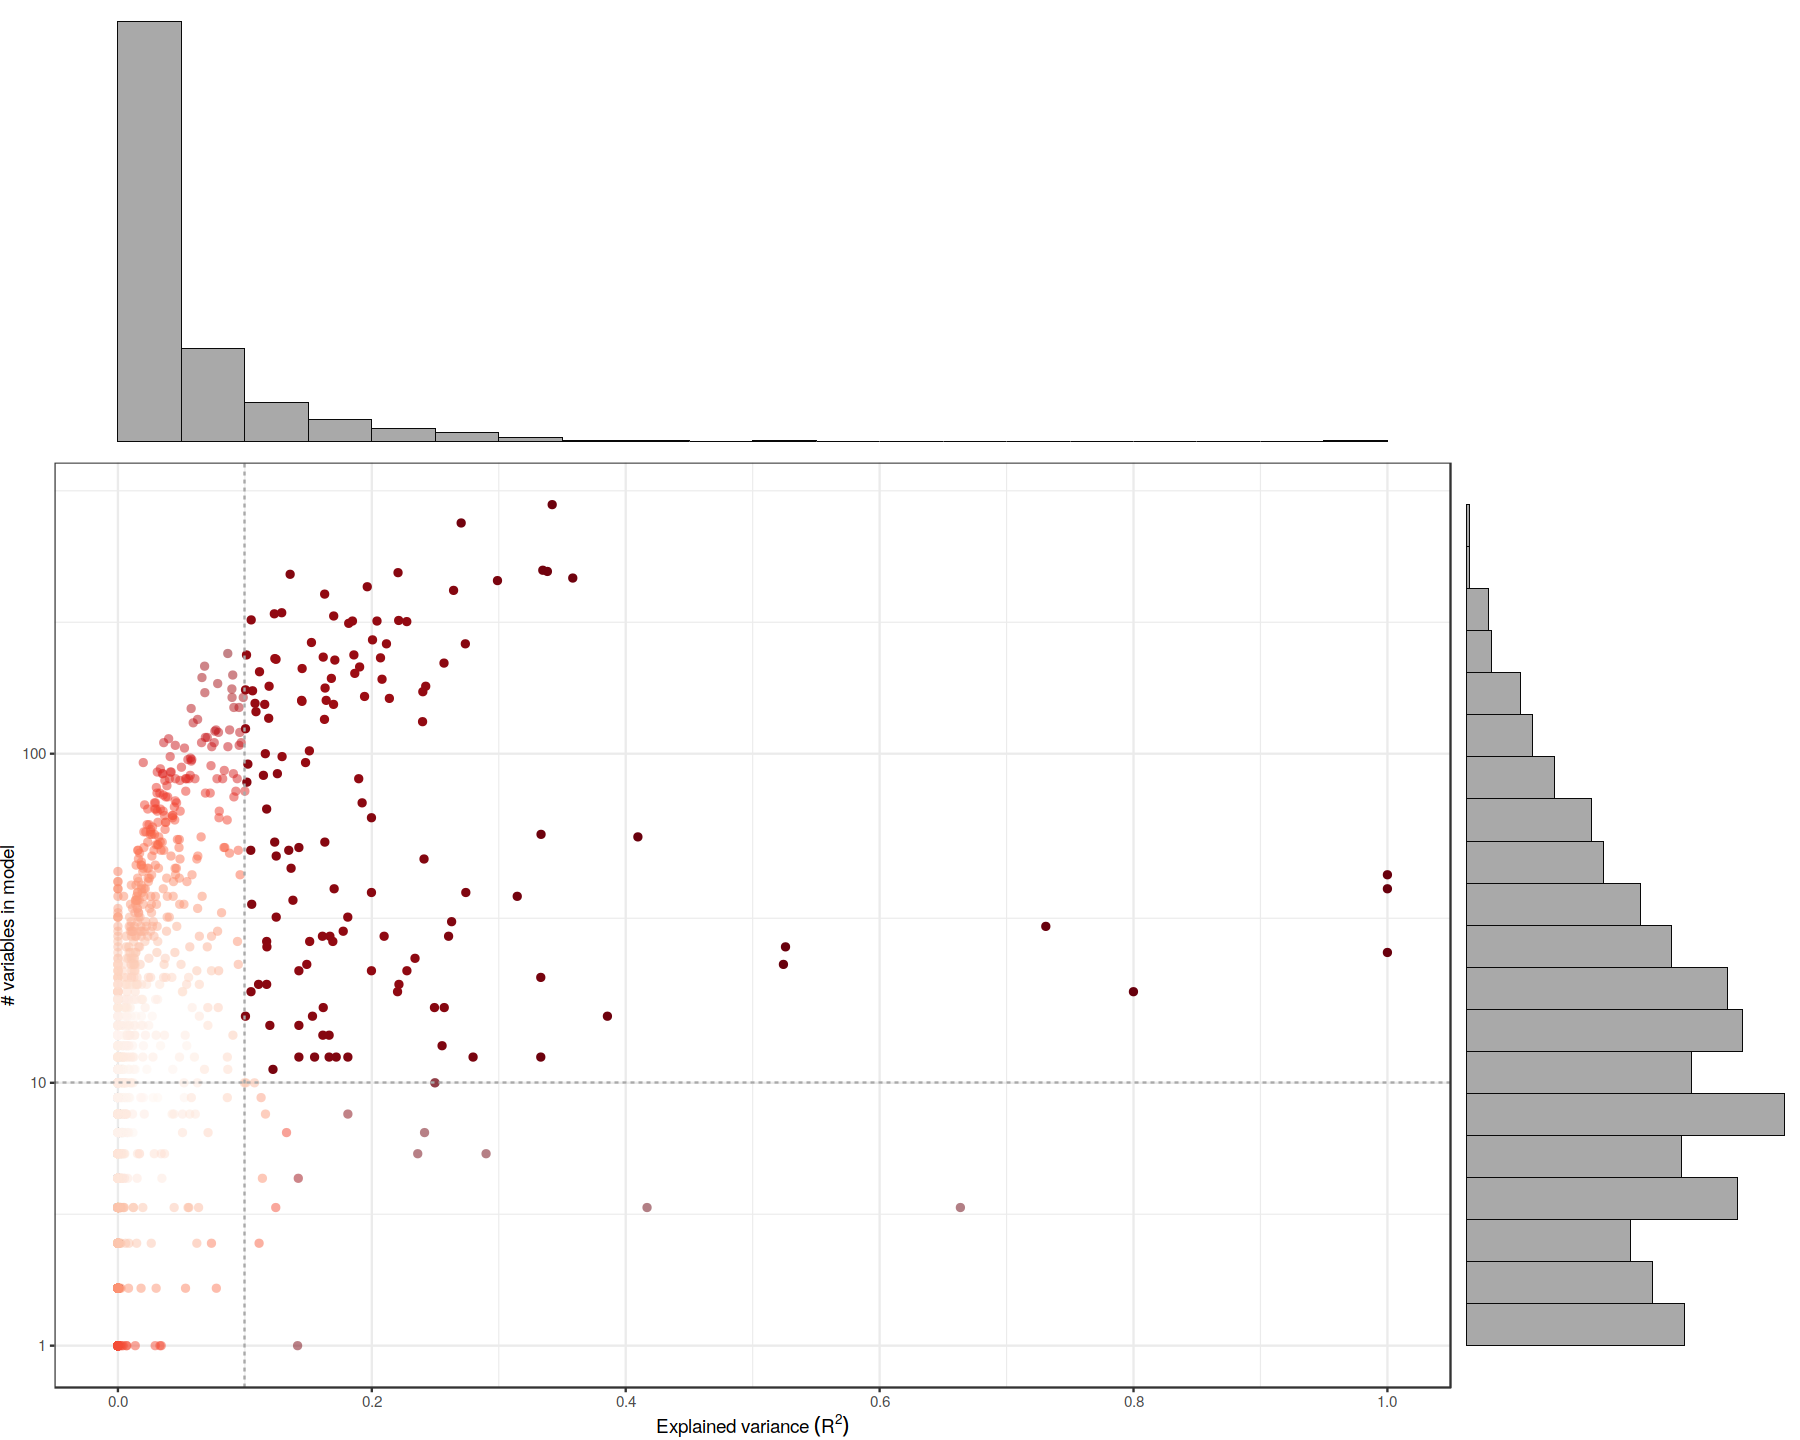

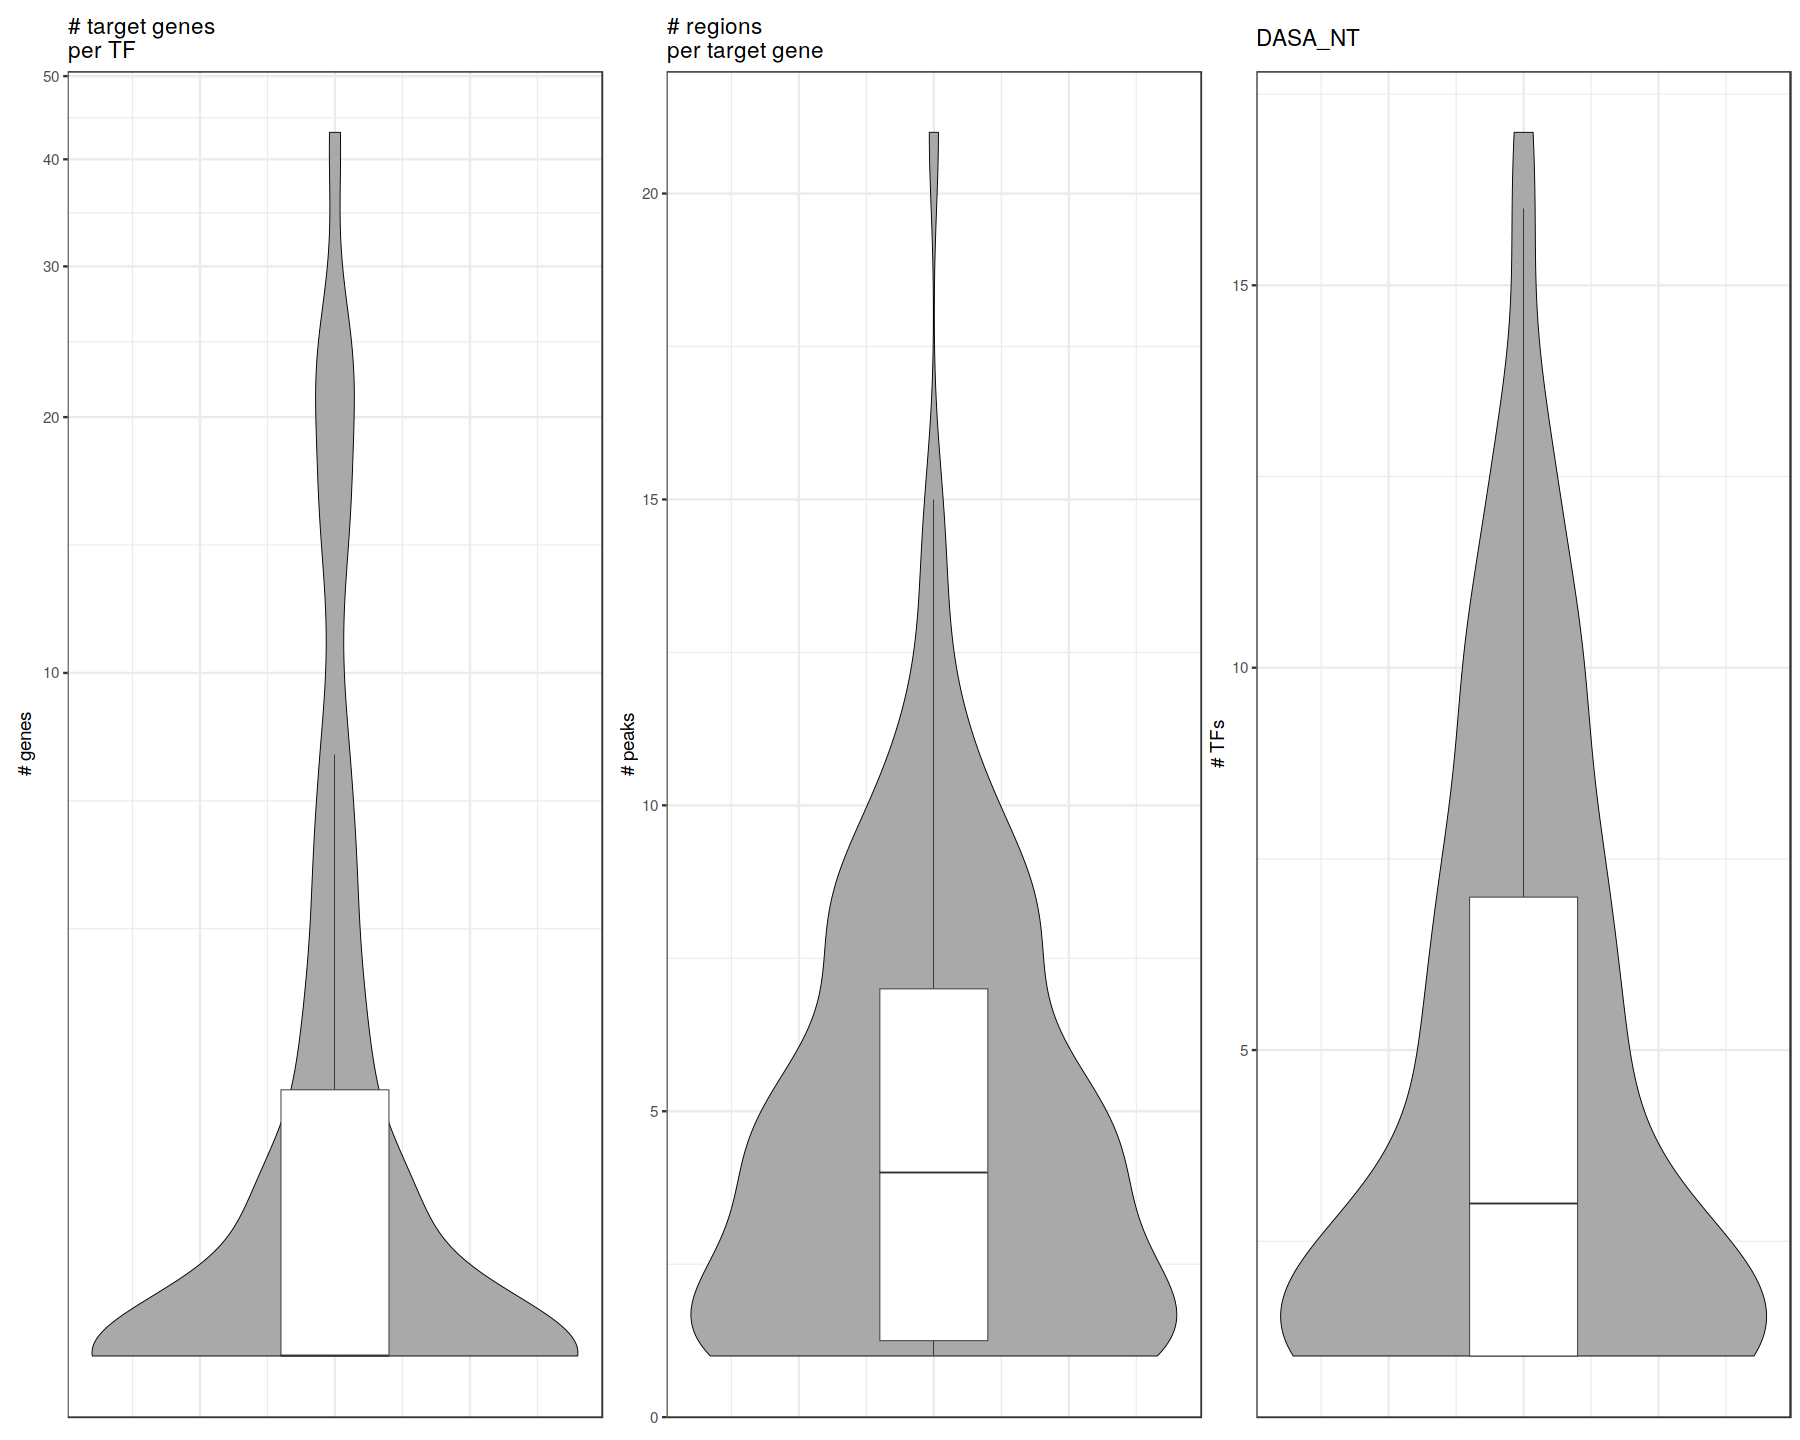

Warning message:
“Using alpha for a discrete variable is not advised.”


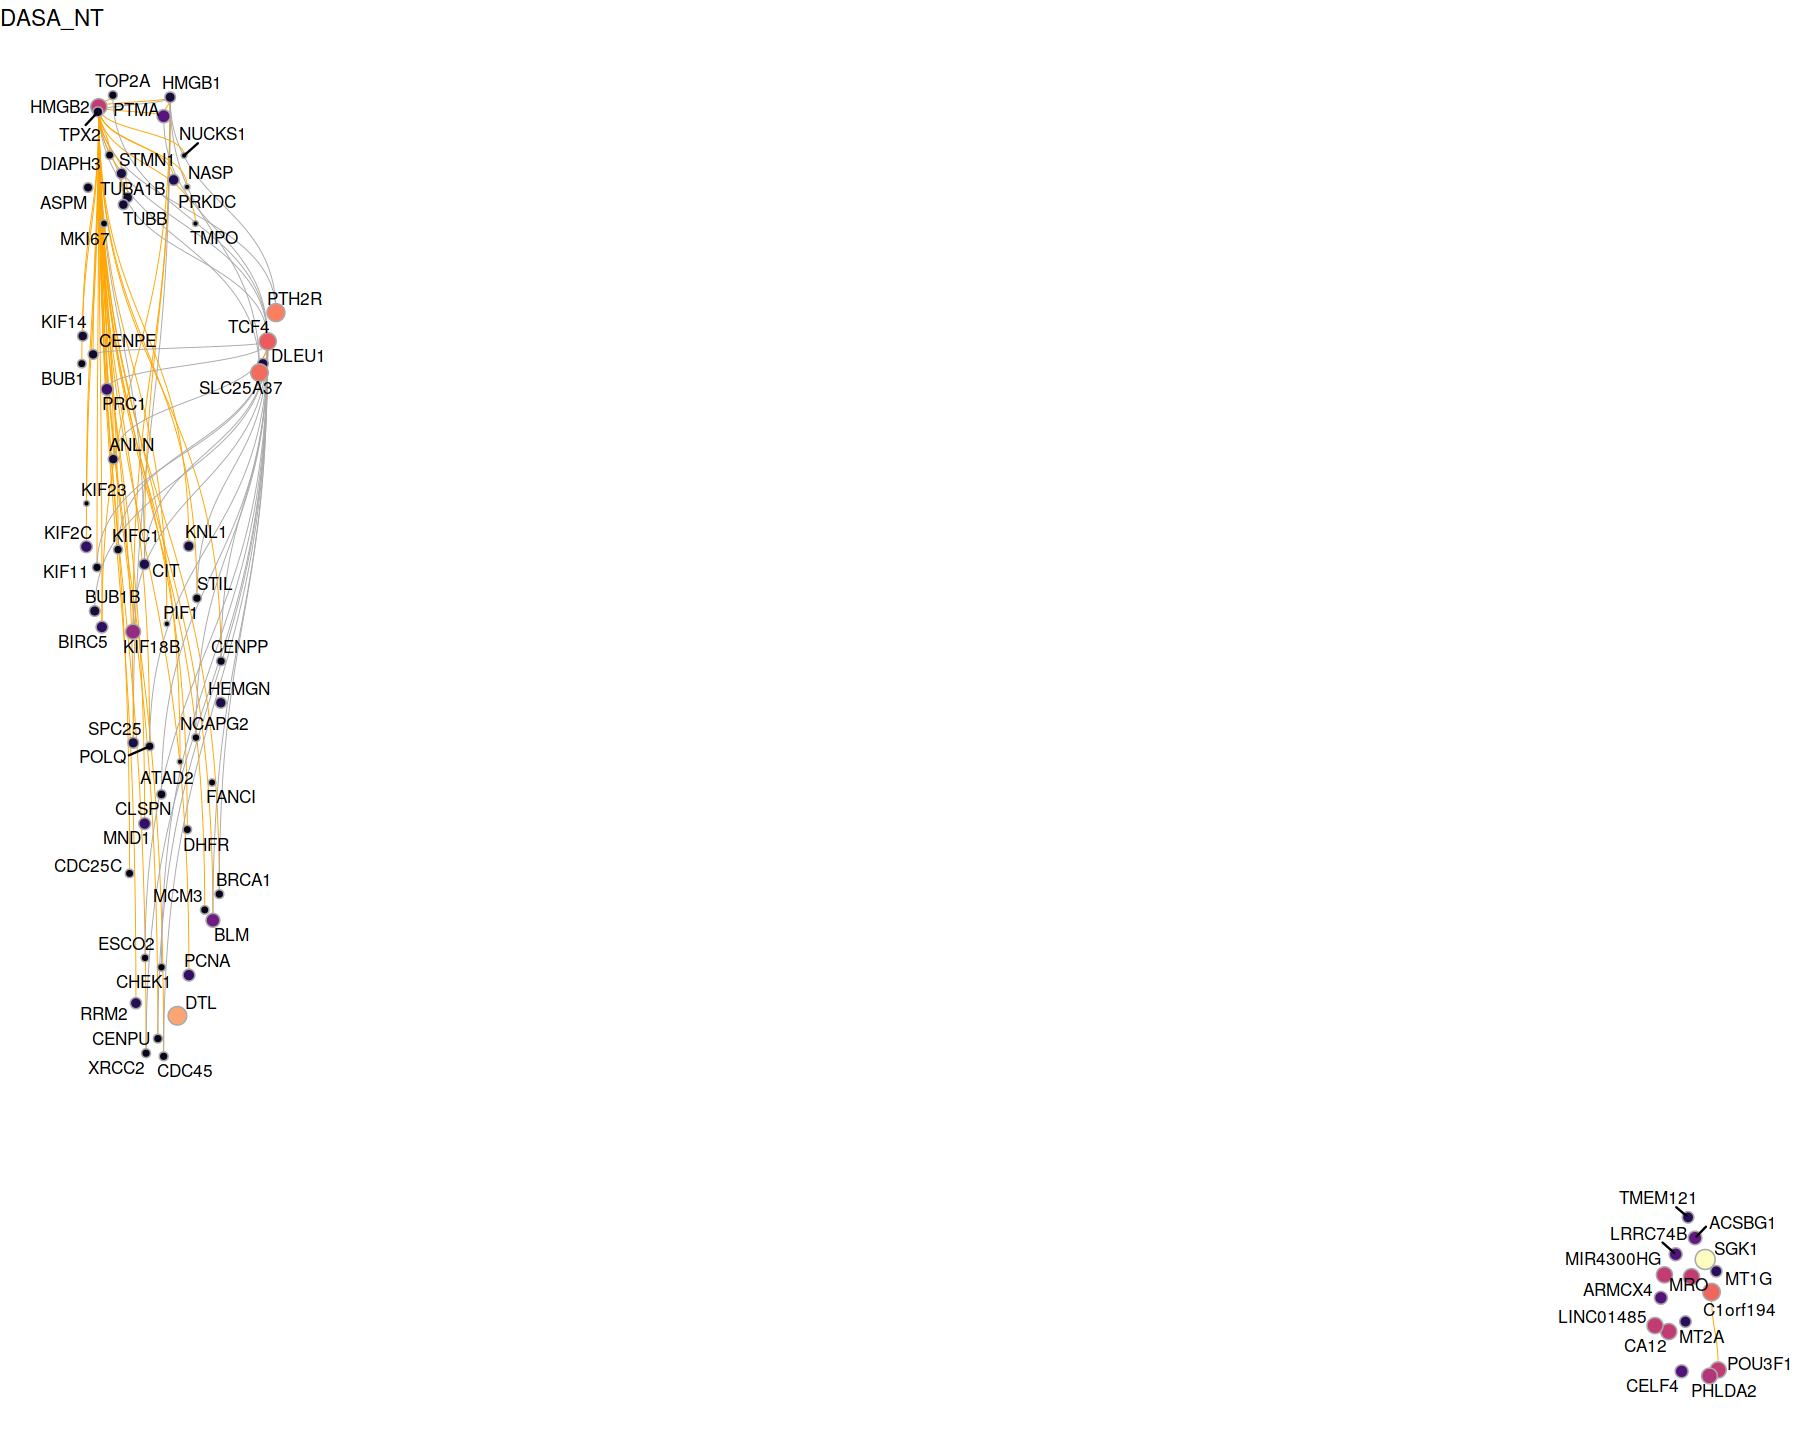

Computing gene-gene correlation

Computing weighted regulatory factor

Computing UMAP embedding

Getting network graph



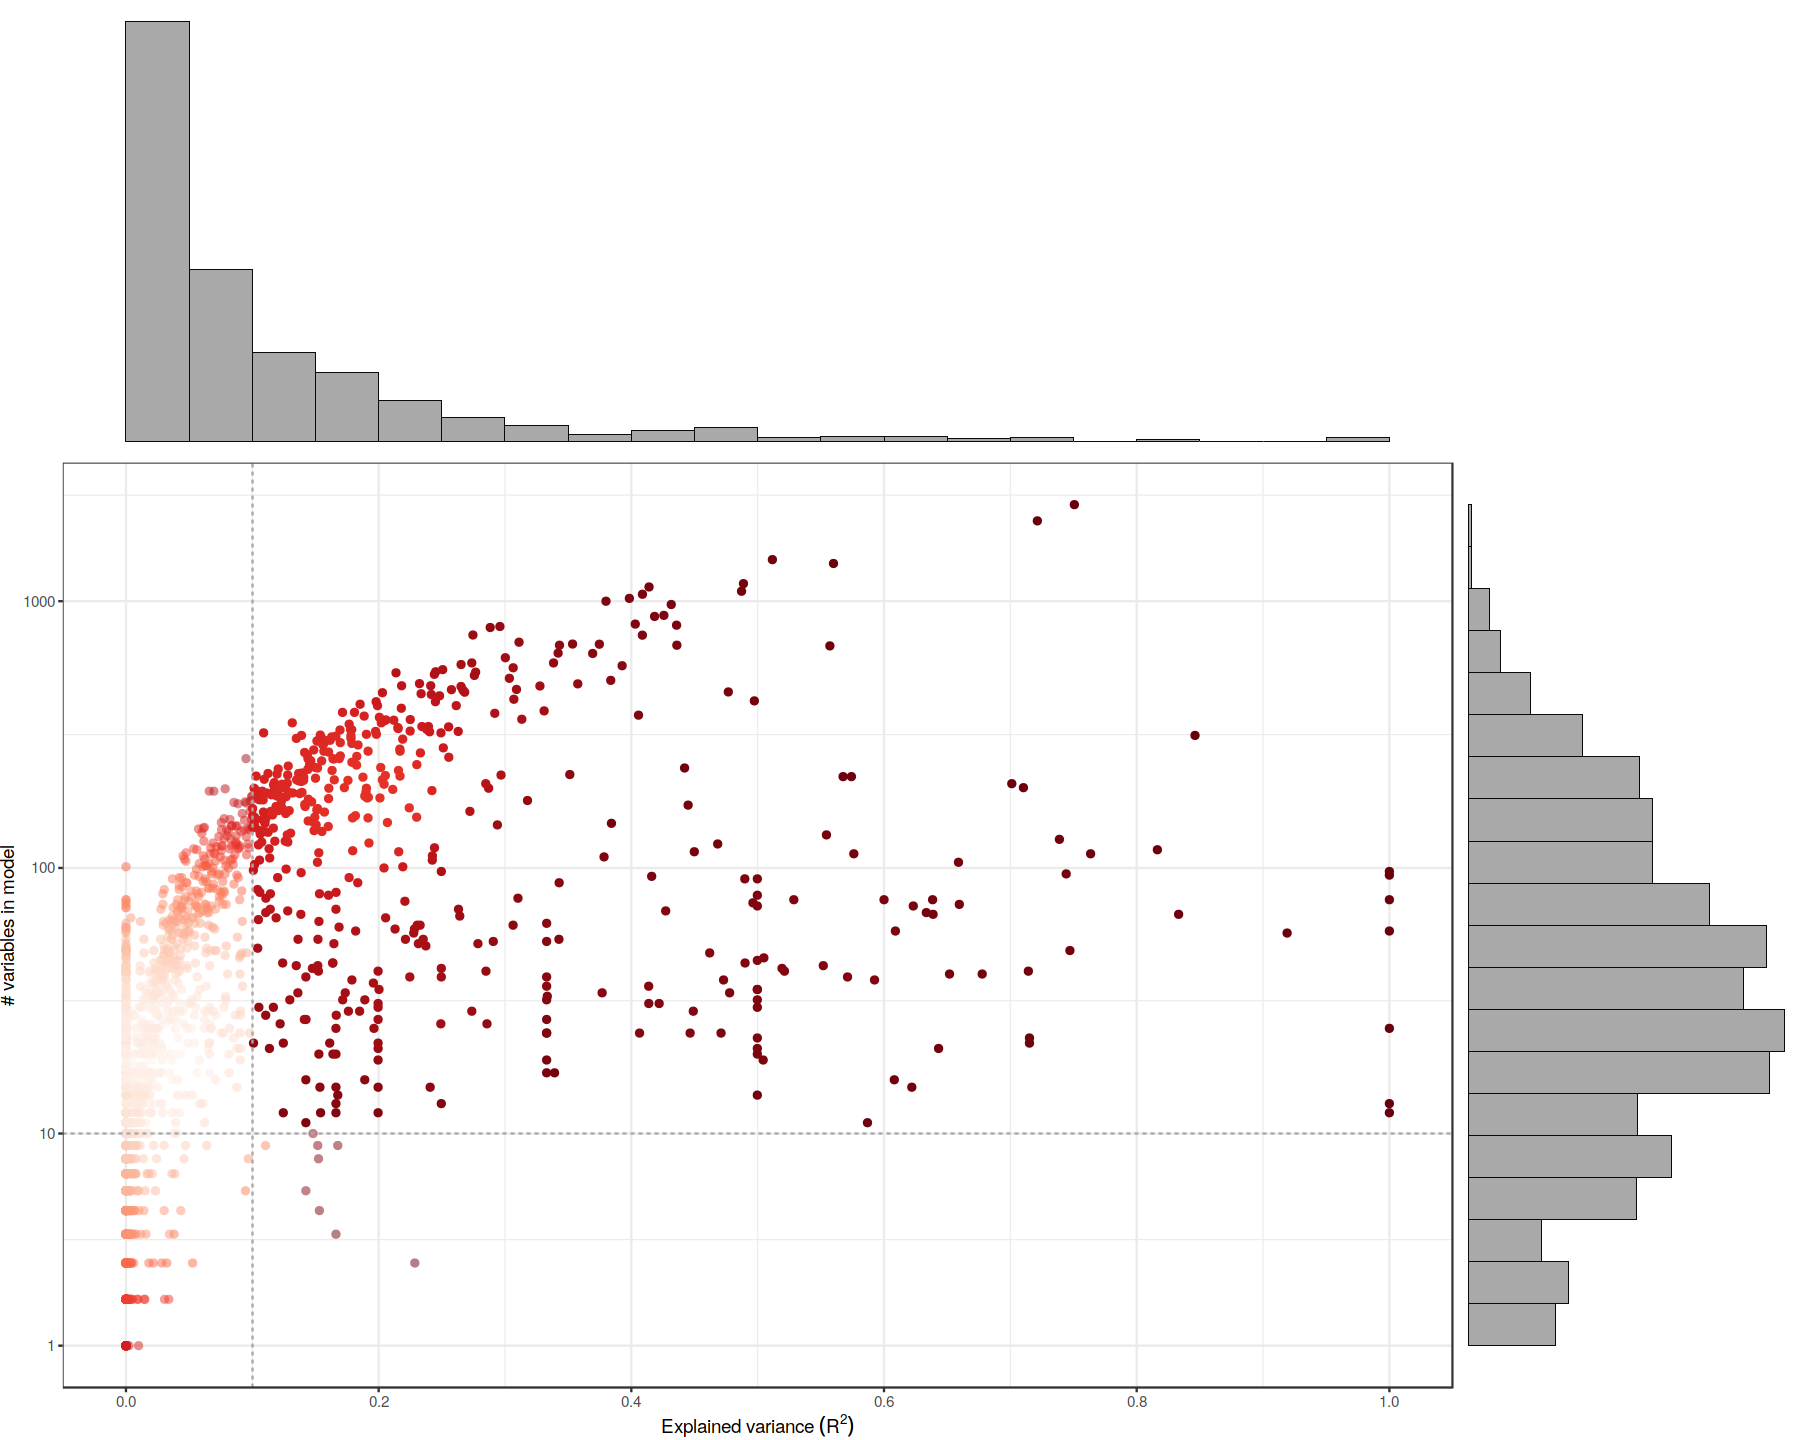

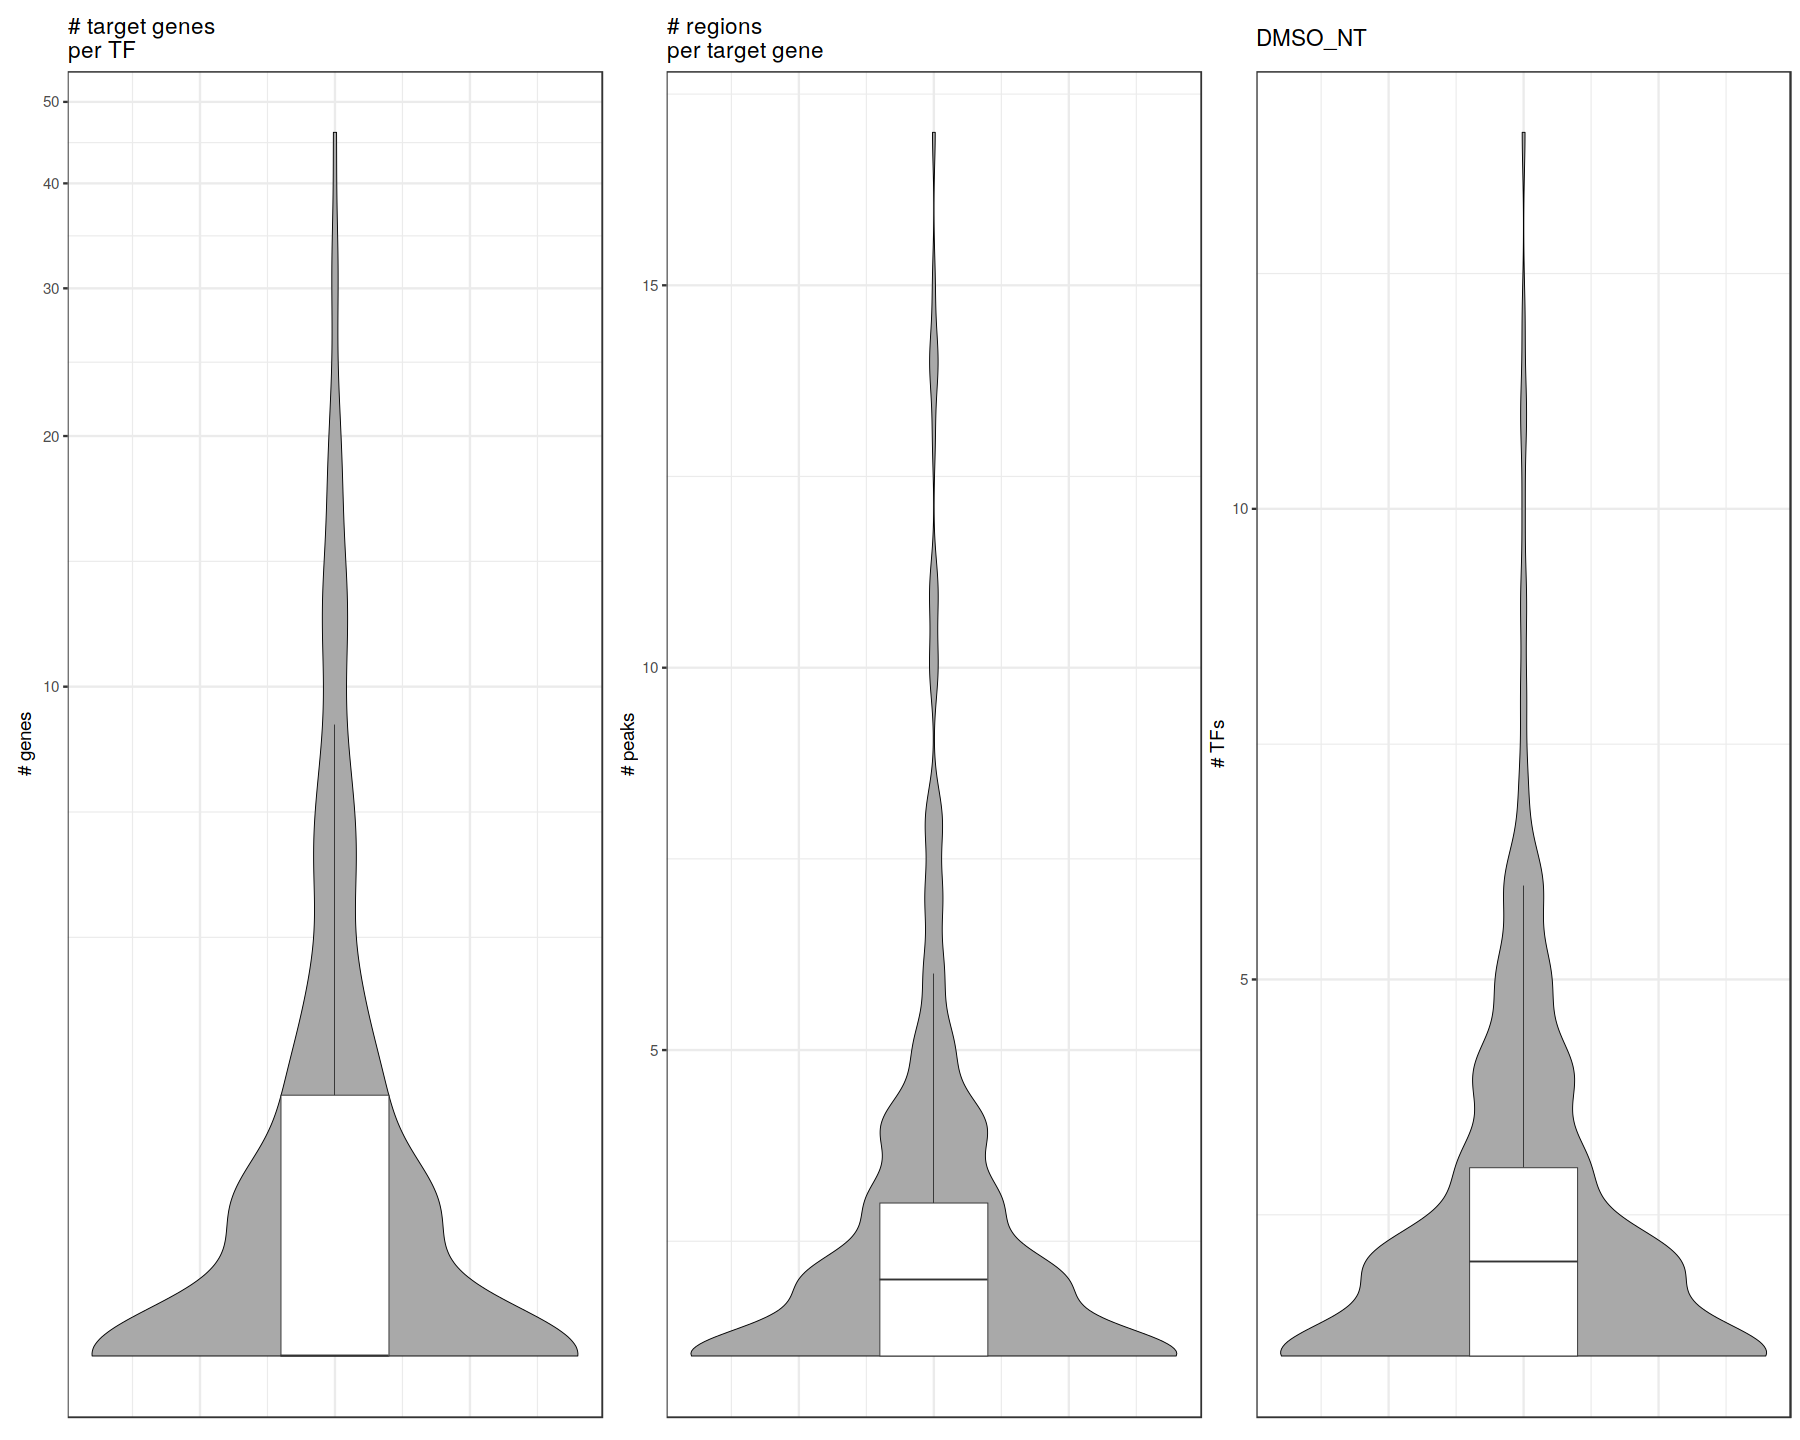

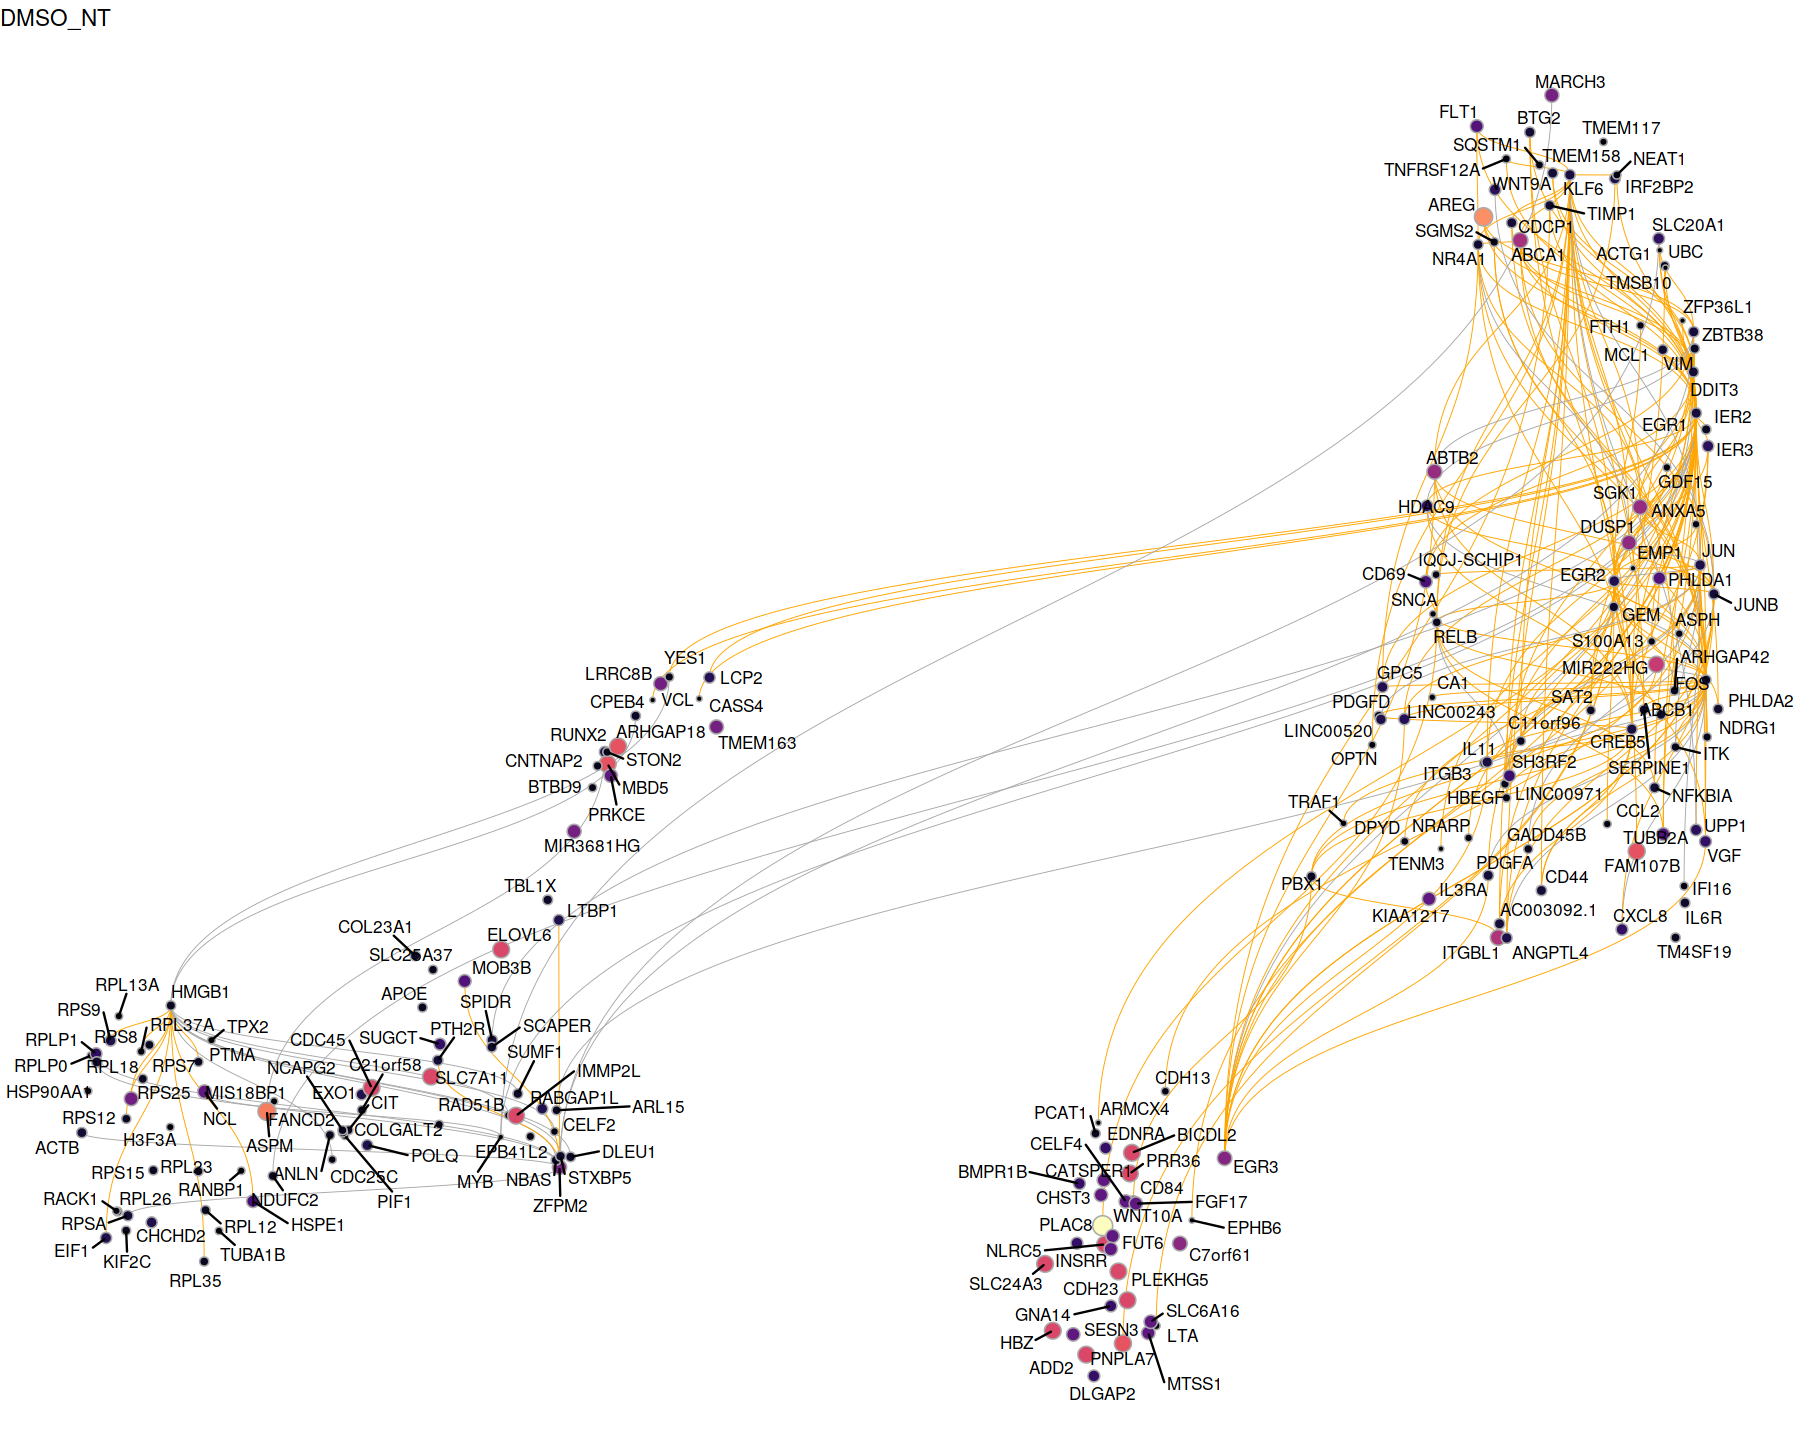

In [91]:
dasa_hic2_sobj <- make_plots(sobj = dasa_hic2_sobj, plot_title ="DASA_HIC2")
dasa_nt_sobj <- make_plots(sobj = dasa_nt_sobj, plot_title ="DASA_NT")
dmso_nt_sobj <- make_plots(sobj = dmso_nt_sobj, plot_title ="DMSO_NT")

In [144]:
# # save networks # write.csv(dasa_hic2_module@meta, file = '{PATH_7}'s in this sample# write.csv(dasa_nt_module@meta, file = '{PATH_8}')# write.csv(dmso_nt_module@meta, file = '{PATH_9}')

# Make subplots

Load in downreg and upreg genes from DASA HIC2 vs DASA NT

In [93]:
feature_list <- read.csv('{PATH_10}')

In [97]:
feature_list[feature_list$avg_log2FC > 0,1:ncol(feature_list)]$X

[1] "HBA1"         "MGST3"        "PRDX2"        "CTSE"         "AMMECR1"     
  [6] "HBG2"         "HBG1"         "TMEM14B"      "STAR"         "TMEM14C"     
 [11] "ESPN"         "AC016629.2"   "HBA2"         "SLC4A1"       "ABCB9"       
 [16] "AHSP"         "ATF7IP2"      "WIPF3"        "AL442636.1"   "MGST2"       
 [21] "CR1L"         "ATP5IF1"      "NDFIP1"       "SPECC1"       "AC007563.2"  
 [26] "MAN1A1"       "AC079804.3"   "HMBS"         "UGCG"         "PKLR"        
 [31] "SLC39A8"      "ZNF83"        "CLTCL1"       "LINC01748"    "CD58"        
 [36] "AK1"          "TNNI3"        "ANK1"         "SCPEP1"       "MARCKSL1"    
 [41] "GRK4"         "CALM3"        "BLVRB"        "PSTPIP2"      "FADS1"       
 [46] "OAT"          "RTL9"         "ITLN1"        "CABIN1"       "PAM16"       
 [51] "SLC6A19"      "NMNAT3"       "DGAT1"        "MIS18BP1"     "TMEM191C"    
 [56] "HBZ"          "KSR1"         "HIST1H1C"     "NAPEPLD"      "CTSB"        
 [61] "HBM"          "UQCR10"       "EGFL8"        "SGMS1"        "PPT2"        
 [66] "GSTO1"        "RAB3IP"       "OPTN"         "LRP10"        "SLC41A1"     
 [71] "TNFRSF14-AS1" "UBXN4"        "OSBPL8"       "HDAC1"        "CYB561A3"    
 [76] "MARCH3"       "REEP6"        "DENND4A"      "PPIF"         "NLK"         
 [81] "FAM210B"      "ZBTB16"       "VPS13D"       "PPARA"        "NUSAP1"      
 [86] "LIPH"         "STAM"         "FGF13"        "SMIM1"        "FAM83A"      
 [91] "LINC01578"    "GATA1"        "BUD23"        "RPS15"        "GRAP2"       
 [96] "PLCD1"        "ETFA"         "THRB"         "PARP14"       "AL713998.1"  
[101] "CYP20A1"      "METTL5"       "APLP2"        "COMT"         "ZNF431"      
[106] "INSIG1"       "SLC18B1"      "RPL8"         "OSBPL9"       "SLC25A29"    
[111] "MAK"          "NFIA"         "PRG2"         "CEBPB"        "AL137001.2"  
[116] "UBC"          "TOP1"         "AL713998.3"   "SLC30A1"      "PRELID2"     
[121] "PTPRF"        "NPW"          "TFR2"         "SLC44A5"      "PRKCA"       
[126] "CPEB4"        "TFRC"         "EIF1B"        "ELOB"         "USP24"       
[131] "HSF1"         "COX6C"        "TFDP1"        "DYNLL1"       "RPS19"       
[136] "SMS"          "RPS28"        "UBA6"         "UCP2"         "CALM2"       
[141] "PSME1"        "MRPL40"

In [100]:
dasa_hic2_sobj <- make_subset_plots(sobj = dasa_hic2_sobj, feature_list =  feature_list, plot_title = "DASA_HIC2")
dasa_nt_sobj <- make_subset_plots(sobj = dasa_nt_sobj, feature_list = feature_list, plot_title = "DASA_NT")
dmso_nt_sobj <- make_subset_plots(sobj = dmso_nt_sobj, feature_list = feature_list, plot_title = "DMSO_NT")

Computing gene-gene correlation

Computing weighted regulatory factor

Computing UMAP embedding

Getting network graph

Getting network graph

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `from_node = .N()$name[from]`.
Caused by warning:
! Unknown or uninitialised column: `name`.”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `to_node = .N()$name[to]`.
Caused by warning:
! Unknown or uninitialised column: `name`.”


ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `dir = sign(estimate)`.
[1mCaused by error:[22m
[33m![39m object 'estimate' not found
